## The Data Overview :

This dataset contains anonymized information about customer subscriptions and their interaction with the service. The data includes various features such as subscription type, payment method, viewing preferences, customer support interactions, and other relevant attributes. It consists of three files such as "test.csv", "train.csv", "data_descriptions.csv".

The Data Description

CustomerID: Unique identifier for each customer

SubscriptionType: Type of subscription plan chosen by the customer (e.g., Basic, Premium, Deluxe)

PaymentMethod: Method used for payment (e.g., Credit Card, Electronic Check, PayPal)

PaperlessBilling: Whether the customer uses paperless billing (Yes/No)

ContentType: Type of content accessed by the customer (e.g., Movies, TV Shows, Documentaries)

MultiDeviceAccess: Whether the customer has access on multiple devices (Yes/No)

DeviceRegistered: Device registered by the customer (e.g., Smartphone, Smart TV, Laptop)

GenrePreference: Genre preference of the customer (e.g., Action, Drama, Comedy)

Gender: Gender of the customer (Male/Female)

ParentalControl: Whether parental control is enabled (Yes/No)

SubtitlesEnabled: Whether subtitles are enabled (Yes/No)

AccountAge: Age of the customer's subscription account (in months)

MonthlyCharges: Monthly subscription charges

TotalCharges: Total charges incurred by the customer

ViewingHoursPerWeek: Average number of viewing hours per week

SupportTicketsPerMonth: Number of customer support tickets raised per month

AverageViewingDuration: Average duration of each viewing session

ContentDownloadsPerMonth: Number of content downloads per month

UserRating: Customer satisfaction rating (1 to 5)

WatchlistSize: Size of the customer's content watchlist

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd



In [48]:

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('train.csv')

In [49]:
data.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [50]:
data.isna().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

Note: `dtypes` is a property of `DataFrame` because it directly exposes the metadata of the object rather than performing any operation or requiring input like a function would.

In [52]:
# Grab Variables
def grab_variable(dataframe, num_th=10, car_th=20, var_name=False):
    
    # Categoric Variables #
    
    cat_var = [i for i in dataframe.columns if dataframe[i].dtypes in ["object", "category", "bool"]]
    
    num_but_cat = [i for i in dataframe.columns if dataframe[i].dtypes in ["int64", "float64"]
                   and dataframe[i].nunique() <= num_th]
    
    cat_but_car = [i for i in dataframe.columns if dataframe[i].dtypes in ["category", "object"]
                   and dataframe[i].nunique() > car_th]
    
    cat_var = cat_var + num_but_cat
    cat_var = [i for i in cat_var if i not in cat_but_car]

    # Numeric Variables #
    num_var = [i for i in dataframe.columns if dataframe[i].dtypes in ["int64", "float64"]
               and dataframe[i].nunique() > num_th]

    print("Observation:", len(dataframe))
    print("Number of Variables:", len(dataframe.columns))
    print("Number of Categoric Variables:", len(cat_var))
    print("Number of Num but Cat Variables:", len(num_but_cat))
    print("Number of Cat but Cardinal Variables:", len(cat_but_car))
    print("Number of Numeric Variables:", len(num_var))

    if var_name:
        print("Categoric Variables:", cat_var)
        print("Numeric But Categoric Variables:", num_but_cat)
        print("Categoric But Cardinal Variables:", cat_but_car)
        print("Numeric Variables:", num_var)
    return cat_var, cat_but_car, num_var

cat_var, cat_but_car, num_var = grab_variable(data)

Observation: 243787
Number of Variables: 21
Number of Categoric Variables: 12
Number of Num but Cat Variables: 2
Number of Cat but Cardinal Variables: 1
Number of Numeric Variables: 8


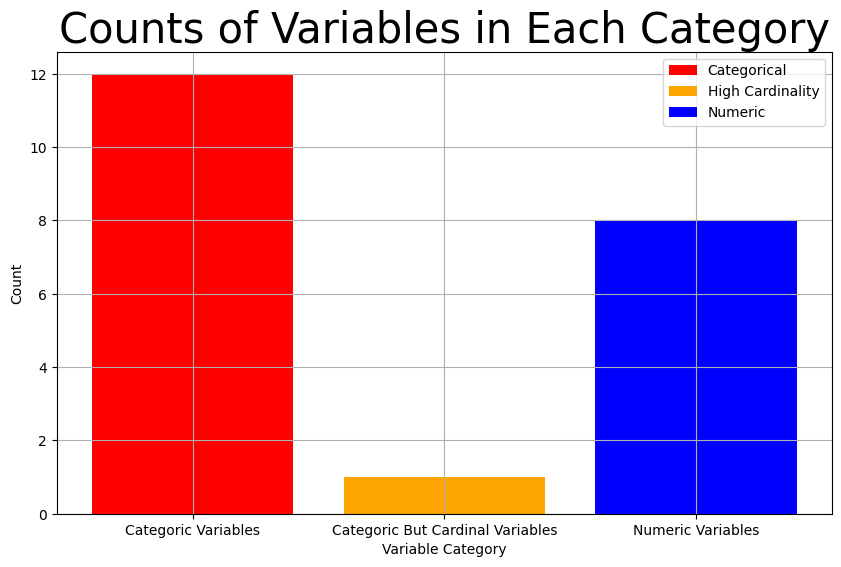

In [53]:
def plot_variable_counts(cat_var, cat_but_car, num_var):
    # Count the number of variables in each category
    category_counts = [len(cat_var), len(cat_but_car), len(num_var)]
    categories = ['Categoric Variables', 'Categoric But Cardinal Variables', 'Numeric Variables']

    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(categories, category_counts, color=['red', 'orange', 'blue'])
    plt.title('Counts of Variables in Each Category', fontsize=30)
    plt.xlabel('Variable Category')
    plt.ylabel('Count')
    plt.grid()
    legend_labels = ['Categorical', 'High Cardinality', 'Numeric']
    plt.legend(bars, legend_labels, loc="upper right")
    plt.show()

plot_variable_counts(cat_var, cat_but_car, num_var)

In [9]:
data=data.drop(columns=['CustomerID'])

In [10]:
def describe_object(df):
    for col in df.select_dtypes(include = ['object']).columns:
        print(f"For {col} : ", df[col].unique())


describe_object(data)

For SubscriptionType :  ['Premium' 'Basic' 'Standard']
For PaymentMethod :  ['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']
For PaperlessBilling :  ['No' 'Yes']
For ContentType :  ['Both' 'Movies' 'TV Shows']
For MultiDeviceAccess :  ['No' 'Yes']
For DeviceRegistered :  ['Mobile' 'Tablet' 'Computer' 'TV']
For GenrePreference :  ['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy']
For Gender :  ['Male' 'Female']
For ParentalControl :  ['No' 'Yes']
For SubtitlesEnabled :  ['No' 'Yes']


In [57]:
# Finding Thresholds (Limits)
def outlier_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    q1 = dataframe[variable].quantile(q1)
    q3 = dataframe[variable].quantile(q3)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

for i in num_var:
    print(i, ":", outlier_thresholds(data, i))



AccountAge : (np.float64(-60.0), np.float64(180.0))
MonthlyCharges : (np.float64(-2.5108822537315287), np.float64(27.487585566502734))
TotalCharges : (np.float64(-811.1084761822483), np.float64(2229.5728643148022))
ViewingHoursPerWeek : (np.float64(-18.419212297484723), np.float64(59.40256110709355))
AverageViewingDuration : (np.float64(-82.90608528289064), np.float64(267.1965276075546))
ContentDownloadsPerMonth : (np.float64(-25.5), np.float64(74.5))
UserRating : (np.float64(-1.0011033867446884), np.float64(7.004113639054296))
WatchlistSize : (np.float64(-12.0), np.float64(36.0))


In [58]:
def check_outlier(dataframe, variable):
    lower_limit, upper_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < lower_limit) | (dataframe[variable] > upper_limit)].shape[0] > 0:
        print(variable, "-->", len(dataframe[(dataframe[variable] < lower_limit) | (dataframe[variable] > upper_limit)]))
        return True
    else:
        return False
        
for i in num_var:
    print(i, ":", check_outlier(data, i))

AccountAge : False
MonthlyCharges : False
TotalCharges --> 741
TotalCharges : True
ViewingHoursPerWeek : False
AverageViewingDuration : False
ContentDownloadsPerMonth : False
UserRating : False
WatchlistSize : False


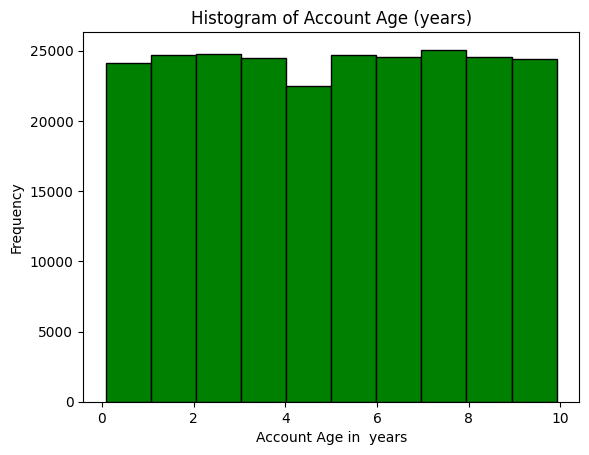

In [11]:
import matplotlib.pyplot as plt

# Create histogram using Pandas & Matplotlib
plt.hist(data['AccountAge']/12, bins=10, color='green', edgecolor='black')
plt.title(f'Histogram of Account Age (years)')
plt.xlabel('Account Age in  years')
plt.ylabel('Frequency')
plt.show()

In [12]:
data['AccountAgeYears']=round(data['AccountAge']/12,1)
data.groupby('AccountAgeYears')['Churn'].count()

AccountAgeYears
0.1    2015
0.2    3982
0.3    2028
0.4    1967
0.5    2088
       ... 
9.5    2006
9.6    2017
9.7    2064
9.8    4074
9.9    2071
Name: Churn, Length: 99, dtype: int64

In [13]:
data.select_dtypes(include=['number']).corr()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,AccountAgeYears
AccountAge,1.000000,0.001706,0.820144,-0.001640,0.000191,0.001220,0.000440,-0.002055,-0.002640,-0.197736,0.999946
MonthlyCharges,0.001706,1.000000,0.498207,-0.003029,-0.000604,-0.000127,0.000056,0.000071,-0.000540,0.100473,0.001719
TotalCharges,0.820144,0.498207,1.000000,-0.003006,0.000860,0.000208,0.000609,-0.001770,-0.001770,-0.120529,0.820109
ViewingHoursPerWeek,-0.001640,-0.003029,-0.003006,1.000000,0.000949,0.002149,-0.003185,0.000788,-0.000750,-0.128645,-0.001622
AverageViewingDuration,0.000191,-0.000604,0.000860,0.000949,1.000000,-0.002397,-0.000406,-0.000158,0.000749,-0.146897,0.000197
ContentDownloadsPerMonth,0.001220,-0.000127,0.000208,0.002149,-0.002397,1.000000,0.001294,-0.000497,0.002324,-0.129752,0.001209
UserRating,0.000440,0.000056,0.000609,-0.003185,-0.000406,0.001294,1.000000,-0.000142,0.002567,0.022124,0.000435
SupportTicketsPerMonth,-0.002055,0.000071,-0.001770,0.000788,-0.000158,-0.000497,-0.000142,1.000000,0.001250,0.084064,-0.002061
WatchlistSize,-0.002640,-0.000540,-0.001770,-0.000750,0.000749,0.002324,0.002567,0.001250,1.000000,0.021739,-0.002637
Churn,-0.197736,0.100473,-0.120529,-0.128645,-0.146897,-0.129752,0.022124,0.084064,0.021739,1.000000,-0.197727


In [14]:
y = data['Churn']  # Target variable
# Define the feature columns (all columns except 'Churn')
X = data.drop(columns=['Churn'])

In [15]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (195029, 20)
X_test shape: (48758, 20)
y_train shape: (195029,)
y_test shape: (48758,)


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numeric_features = X.select_dtypes(include = ['number']).columns.to_list()
categorical_features =X.select_dtypes(include = ['object']).columns.to_list()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
        
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))                     # One-hot encode categories
])


# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [17]:
from sklearn.linear_model import SGDClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('model', SGDClassifier())             # ML model
])

# Fit the pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['AccountAge',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'ViewingHoursPerWeek',
                                                   'AverageViewingDuration',
                                                   'ContentDownloadsPerMonth',
                                                   'UserRating',
                                                   'SupportTicketsPerMonth',
                                                   'WatchlistSize',
                                                   'AccountAgeYears']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SubscriptionType',
                                                   'PaymentMethod',
                                                   'PaperlessBilling',
                                                   'ContentType',
                                                   'MultiDeviceAccess',
                                                   'DeviceRegistered',
                                                   'GenrePreference', 'Gender',
                                                   'ParentalControl',
                                                   'SubtitlesEnabled'])])),
                ('model', SGDClassifier())])

In [18]:
# Make predictions
predictions = pipeline.predict(X_test)
print("Predictions:", predictions)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(predictions, y_test)
print("Accuracy:", accuracy)

Predictions: [0 0 0 ... 0 0 0]
Accuracy: 0.80479100865499


In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_predict

Y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=5)

print(confusion_matrix(y_train,Y_train_pred))
print("Precision", precision_score(y_train,Y_train_pred))
print("Recall", recall_score(y_train,Y_train_pred))

[[146273  13364]
 [ 27369   8023]]
Precision 0.3751344274559312
Recall 0.2266896473779385


#### Testing for changing recall with change in threshold! This excercsie is just to get a custom threshold for model needs, our current model is still not good enough for that.

In [20]:
from sklearn.metrics import precision_recall_curve
Y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=5,method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, Y_train_pred)

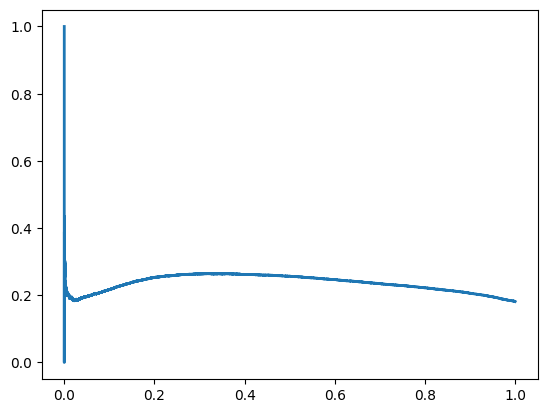

In [21]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

In [22]:
from sklearn.ensemble import RandomForestClassifier

pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('model', RandomForestClassifier())             # ML model
])

# Fit the pipeline
pipeline_RF.fit(X_train, y_train)

Y_train_pred = cross_val_predict(pipeline_RF, X_train, y_train, cv=5)

print(confusion_matrix(y_train,Y_train_pred))
print("Precision", precision_score(y_train,Y_train_pred))
print("Recall",recall_score(y_train,Y_train_pred))

[[157732   1905]
 [ 32878   2514]]
Precision 0.5689069925322471
Recall 0.07103300180831826


For a **churn model**, the choice between precision and recall depends on the business context, here we would want to **prioritize recall** while maintaining a reasonable level of precision.

1. **Focus on Recall**:
   - **Why?**: Recall ensures that we identify as many churners as possible (low false negatives). Missing a churner is risky because it means we could be losing a customer without taking proactive action.
   - **Example**: If we fail to identify a churner, we would lose the chance to offer retention strategies, like discounts or improved service.

2. **Precision is Still Important**:
   - **Why?**: High precision ensures that the customers flagged as likely churners are actually at risk (low false positives). This is important to avoid wasting resources on customers who are unlikely to churn.
   - **Example**: If precision is too low, you might offer retention incentives to customers who don’t need them, leading to unnecessary costs.


### **Practical Approach based on Business Needs**
- If retaining customers is critical, then **recall**. Flagging more potential churners, even if it includes false positives, is safer.
- If the budget for this feature is restrained based on small budget (low costs) (e.g., retention campaigns), ensure a balance by optimizing the **F1-Score**.


In [23]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds=roc_curve(y_train,Y_train_pred)

The ROC curve plots
sensitivity (recall) versus 1 – specificity.

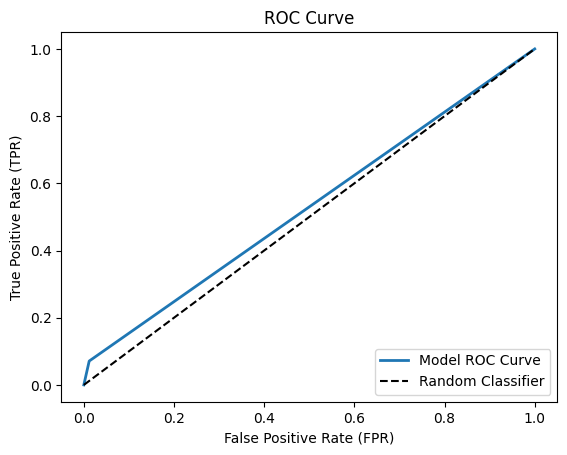

In [26]:

plt.plot(fpr, tpr, linewidth=2, label="Model ROC Curve")

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Enhance the plot with labels, title, and legend
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")

# Display the plot
plt.show()

In [32]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 558.5 kB/s eta 0:04:29
   ---------------------------------------- 0.1/150.0 MB 558.5 kB/s eta 0:04:29
   ---------------------------------------- 0.2/150.0 MB 706.2 kB/s eta 0:03:33
   ---------------------------------------- 0.2/150.0 MB 706.2 kB/s eta 0:03:33
   ---------------------------------------- 0.2/150.0 MB 706.2 kB/s eta 0:03:33
   ---------------------------------------- 0.3/150.0 MB 881.8 kB/s eta 0:02:50
   ---------------------------------------- 0.7/150.0 MB 1.8 MB/s eta 0:01:24
   -------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['number']).columns.to_list()
categorical_features = X.select_dtypes(include=['object']).columns.to_list()

# List of ordinal features and their defined order
ordinal_features = ['SubscriptionType']
ordinal_categories = [['Basic', 'Standard', 'Premium']]  # Order defined explicitly

# Separate remaining categorical features
remaining_categorical_features = [col for col in categorical_features if col not in ordinal_features]

# Numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Ordinal transformer for ordered categorical variables
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(categories=ordinal_categories))
])

# One-hot encoder for remaining categorical variables
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ordinal', ordinal_transformer, ordinal_features),
        ('cat', categorical_transformer, remaining_categorical_features)
    ]
)
pipeline_XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))             # ML model
])

# Fit the pipeline
pipeline_XGB.fit(X_train, y_train)

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
Y_train_pred = cross_val_predict(pipeline_XGB, X_train, y_train, cv=skf)

print(confusion_matrix(y_train,Y_train_pred))
print("Precision", precision_score(y_train,Y_train_pred))
print("Recall",recall_score(y_train,Y_train_pred))

c:\Users\nandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:09:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\nandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:09:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\nandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:09:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\nandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:09:51] WARNING: C:\actio

[[155265   4372]
 [ 30778   4614]]
Precision 0.5134653906076119
Recall 0.13036844484629295


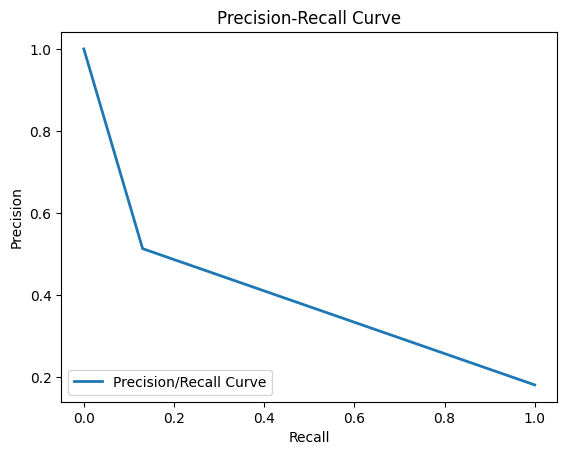

In [41]:
precision, recall, thresholds = precision_recall_curve(y_train, Y_train_pred)

# Plot Precision-Recall curve
plt.plot(recall, precision, linewidth=2, label="Precision/Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()


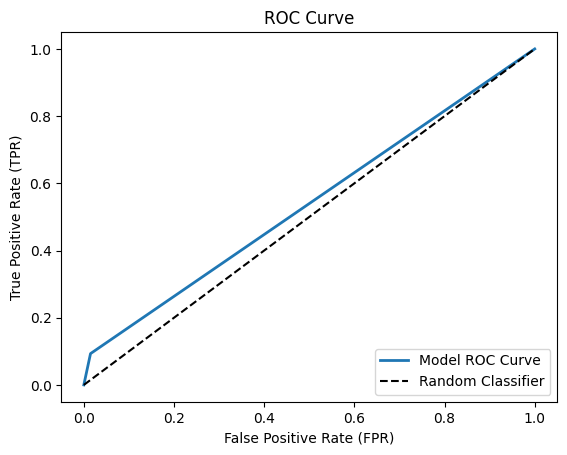

In [29]:
fpr, tpr, thresholds=roc_curve(y_train,Y_train_pred)
plt.plot(fpr, tpr, linewidth=2, label="Model ROC Curve")
# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
# Enhance the plot with labels, title, and legend
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
# Display the plot
plt.show()

c:\Users\nandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\nandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\nandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\nandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:47] WARNING: C:\actio

[[155265   4372]
 [ 30778   4614]]
Precision 0.5134653906076119
Recall 0.13036844484629295


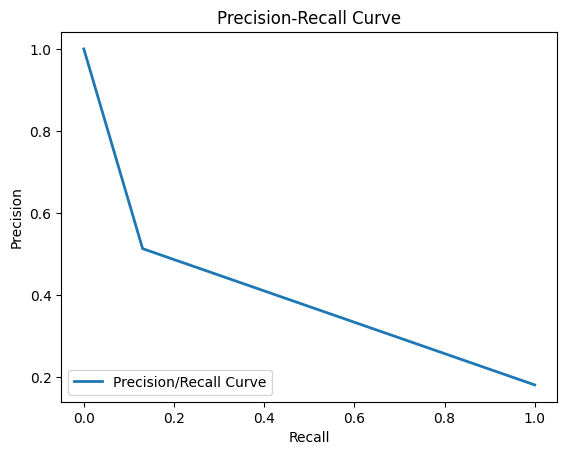

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['number']).columns.to_list()
categorical_features = X.select_dtypes(include=['object']).columns.to_list()

# List of ordinal features and their defined order
ordinal_features = ['SubscriptionType']
ordinal_categories = [['Basic', 'Standard', 'Premium']]  # Order defined explicitly

# Separate remaining categorical features
remaining_categorical_features = [col for col in categorical_features if col not in ordinal_features]

# Numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Ordinal transformer for ordered categorical variables
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(categories=ordinal_categories))
])

# One-hot encoder for remaining categorical variables
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ordinal', ordinal_transformer, ordinal_features),
        ('cat', categorical_transformer, remaining_categorical_features)
    ]
)
pipeline_DC = Pipeline(steps=[
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('model', DecisionTreeClassifier())             # ML model
])

# Fit the pipeline
pipeline_DC.fit(X_train, y_train)

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
Y_train_pred = cross_val_predict(pipeline_XGB, X_train, y_train, cv=skf)

print(confusion_matrix(y_train,Y_train_pred))
print("Precision", precision_score(y_train,Y_train_pred))
print("Recall",recall_score(y_train,Y_train_pred))



precision, recall, thresholds = precision_recall_curve(y_train, Y_train_pred)

# Plot Precision-Recall curve
plt.plot(recall, precision, linewidth=2, label="Precision/Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()
